# Data Visualization

Importing the essential libraries

In [2]:
import pandas as pd
pd.set_option('display.max_rows',500)

import numpy as np


# John Hopkins data from the GitHub

Embedded git pull in the notebook

In [3]:
# git_pull = subprocess.Popen( "/usr/bin/git pull" , 
#                      cwd = os.path.dirname( '../data/raw/COVID-19/' ), 
#                      shell = True, 
#                      stdout = subprocess.PIPE, 
#                      stderr = subprocess.PIPE )
# (out, error) = git_pull.communicate()


# print("Error : " + str(error)) 
# print("out : " + str(out))

In [4]:
path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(path)

In [5]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/6/22,7/7/22,7/8/22,7/9/22,7/10/22,7/11/22,7/12/22,7/13/22,7/14/22,7/15/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,182979,183084,183221,183235,183265,183268,183272,183285,183358,183407
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,283811,284758,285731,286732,287984,288176,289391,290954,290954,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266181,266202,266228,266246,266257,266274,266303,266328,266356,266392
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,44671,44671,44671,44671,44671,44671
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101320,101320,101320,101320,101320,101320,101320,101320,101600,101901


separate the dates in the dataset

In [6]:
time_idx = pd_raw.columns[4:]


In [7]:
df_plot = pd.DataFrame({'date': time_idx})
df_plot.head()


,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [8]:
len(pd_raw["Country/Region"]) # Finding the total number of countries in the dataset

285

In [9]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/6/22,7/7/22,7/8/22,7/9/22,7/10/22,7/11/22,7/12/22,7/13/22,7/14/22,7/15/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,182979,183084,183221,183235,183265,183268,183272,183285,183358,183407
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,283811,284758,285731,286732,287984,288176,289391,290954,290954,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266181,266202,266228,266246,266257,266274,266303,266328,266356,266392
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,44671,44671,44671,44671,44671,44671
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101320,101320,101320,101320,101320,101320,101320,101320,101600,101901


In [10]:
pd_raw[pd_raw["Country/Region"]=='US'].iloc[:,4::].sum(axis=0)

1/22/20           1
1/23/20           1
1/24/20           2
1/25/20           2
1/26/20           5
             ...   
7/11/22    88795972
7/12/22    88946104
7/13/22    89149141
7/14/22    89294234
7/15/22    89453076
Length: 906, dtype: int64

In [11]:
country_list = ['India', 'US', 'Italy', 'France', 'Vietnam', 'Germany']


In [12]:
for each in country_list:
    df_plot[each] = np.array(pd_raw[pd_raw["Country/Region"]==each].iloc[:,4::].sum(axis = 0))

<AxesSubplot:xlabel='date'>

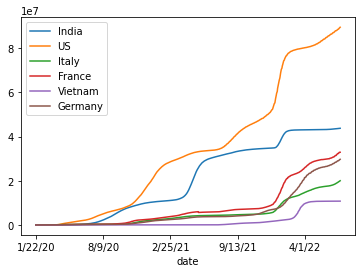

In [13]:
%matplotlib inline
df_plot.set_index('date').plot()

# Data type Date

In [14]:
# Changing the date time format

from datetime import datetime

In [15]:
time_idx = [datetime.strptime(each,'%m/%d/%y')for each in df_plot.date]
time_str = [each.strftime('%y-%m-%d')for each in time_idx]
time_str[0:5]

['20-01-22', '20-01-23', '20-01-24', '20-01-25', '20-01-26']

In [16]:
df_plot['date'] = time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
df_plot.head()

,date,India,US,Italy,France,Vietnam,Germany
0,2020-01-22,0,1,0,0,0,0
1,2020-01-23,0,1,0,0,2,0
2,2020-01-24,0,2,0,2,2,0
3,2020-01-25,0,2,0,3,2,0
4,2020-01-26,0,5,0,3,2,0


In [18]:
df_plot.to_csv('/media/dell/6AA88A06A889D14D/EDS/data/processed/COVID_small_flat_table.csv', sep = ';', index = False)

# Relational Data Model - defining primary key

In [19]:
path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(path)

pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/6/22,7/7/22,7/8/22,7/9/22,7/10/22,7/11/22,7/12/22,7/13/22,7/14/22,7/15/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,182979,183084,183221,183235,183265,183268,183272,183285,183358,183407
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,283811,284758,285731,286732,287984,288176,289391,290954,290954,293917
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266181,266202,266228,266246,266257,266274,266303,266328,266356,266392
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,44671,44671,44671,44671,44671,44671,44671,44671,44671,44671
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,101320,101320,101320,101320,101320,101320,101320,101320,101600,101901


In [20]:
pd_data_base = pd_raw.rename(columns = {'Country/Region': 'country', 
                              'Province/State': 'state'})

In [21]:
pd_data_base = pd_data_base.drop(['Lat', 'Long'], axis =1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,7/6/22,7/7/22,7/8/22,7/9/22,7/10/22,7/11/22,7/12/22,7/13/22,7/14/22,7/15/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,182979,183084,183221,183235,183265,183268,183272,183285,183358,183407
1,NaN,Albania,0,0,0,0,0,0,0,0,...,283811,284758,285731,286732,287984,288176,289391,290954,290954,293917
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,266181,266202,266228,266246,266257,266274,266303,266328,266356,266392
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,44671,44671,44671,44671,44671,44671,44671,44671,44671,44671
4,NaN,Angola,0,0,0,0,0,0,0,0,...,101320,101320,101320,101320,101320,101320,101320,101320,101600,101901


In [22]:
pd_relational_model = pd_data_base.set_index(['state', 'country'])\
                                    .T \
                                    .stack(level=[0,1]) \
                                    .reset_index() \
                                    .rename(columns = {'level_0': 'date', 0: 'confirmed'})

pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [23]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [24]:
pd_relational_model['date'] = pd_relational_model.date.astype('datetime64[ns]')

In [25]:
pd_relational_model.dtypes


date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [26]:
pd_relational_model.to_csv('/media/dell/6AA88A06A889D14D/EDS/data/processed/COVID_relational_confirmed.csv', sep = ';')

In [28]:
pd_JH_data = pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep = ';', parse_dates= [0])
pd_JH_data = pd_JH_data.sort_values('date', ascending= True).reset_index(drop=True).copy()
pd_JH_data.head()

,Unnamed: 0,date,state,country,confirmed
0,0,2020-01-22,NaN,Afghanistan,0.0
1,181,2020-01-22,NaN,US,1.0
2,182,2020-01-22,NaN,Uganda,0.0
3,183,2020-01-22,NaN,Ukraine,0.0
4,184,2020-01-22,NaN,United Arab Emirates,0.0


In [29]:
test_data = pd_JH_data[(pd_JH_data['country']=='US')|
                        (pd_JH_data['country']=='Germany')&
                        (pd_JH_data['date']>'2022-06-10')]

In [30]:
test_data

,Unnamed: 0,date,state,country,confirmed
1,181,2020-01-22,NaN,US,1.0
294,466,2020-01-23,NaN,US,1.0
576,751,2020-01-24,NaN,US,2.0
867,1036,2020-01-25,NaN,US,2.0
1151,1321,2020-01-26,NaN,US,5.0
...,...,...,...,...,...
257521,257419,2022-07-13,NaN,Germany,29460249.0
257651,257821,2022-07-14,NaN,US,89294234.0
257805,257704,2022-07-14,NaN,Germany,29569943.0
257936,258106,2022-07-15,NaN,US,89453076.0


dtype('O')

In [39]:
test_data.groupby(['country']).agg(np.max)

,Unnamed: 0,date,state,confirmed
country,,,,
Germany,257989,2022-07-15,NaN,29692989.0
US,99931,2022-07-15,NaN,89453076.0


In [78]:
# %load src/features/build_features.py

import numpy as np
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
import pandas as pd

from scipy import signal


def get_doubling_time_via_regression(in_array):
    
    # y = np.array(in_array['confirmed'])
    # X =np.arange(len(y)).reshape(-1,1)

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    
    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope




# if __name__ == '__main__':
#     test_data_reg=np.array([2,4,6])
#     result=get_doubling_time_via_regression(test_data_reg)
#     print('the test slope is: '+str(result))

    

In [79]:
test_data['state'] = test_data['state'].fillna(0)
test_data.groupby(['state','country']).agg(np.max)

Unnamed: 0        date   confirmed
state country                                   
0     Germany     257989  2022-07-15  29692989.0
      US           99931  2022-07-15  89453076.0

In [81]:
# test_data.groupby(['state','country']).apply(get_doubling_time_via_regression)

In [82]:
def rolling_reg(df_input, col = 'confirmed'):
    days_back = 3
    result = df_input[col].rolling(
                                    window = days_back,
                                    min_periods = days_back). apply(get_doubling_time_via_regression, raw =False)

    return result
    


In [83]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state  country        
0      Germany  248400           NaN
                248685           NaN
                248970    482.704820
                249254    271.571735
                249540    297.613719
                             ...    
       US       256796    827.799530
                257081    504.626988
                257366    503.802650
                257651    512.049099
                257936    587.617859
Name: confirmed, Length: 941, dtype: float64

In [85]:
pd_DR_result = pd_JH_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index()

In [104]:
pd_DR_result = pd_DR_result.rename(columns= {'confirmed':'doubling_rate', 'level_2': 'index'})

pd_DR_result.head()

pd_DR_result['index'].dtype

dtype('int64')

In [105]:
pd_JH_data.reset_index()
pd_JH_data.rename(columns={'Unnamed: 0':'index'}, inplace=True)
pd_JH_data['index'] = pd_JH_data['index'].astype(int)
pd_JH_data.head()

pd_JH_data['index'].dtype



dtype('int64')

In [110]:
pd_result_large = pd.merge(pd_JH_data, pd_DR_result[['index' ,'doubling_rate']], on = ['index'], how = 'left')

In [112]:
pd_result_large[pd_result_large['country']=='Germany']

,index,date,state,country,confirmed,doubling_rate
166,64,2020-01-22,NaN,Germany,0.0,NaN
451,349,2020-01-23,NaN,Germany,0.0,NaN
735,634,2020-01-24,NaN,Germany,0.0,NaN
1020,919,2020-01-25,NaN,Germany,0.0,NaN
1306,1204,2020-01-26,NaN,Germany,0.0,NaN
...,...,...,...,...,...,...
256951,256849,2022-07-11,NaN,Germany,29180489.0,NaN
257235,257134,2022-07-12,NaN,Germany,29308100.0,NaN
257521,257419,2022-07-13,NaN,Germany,29460249.0,NaN
257805,257704,2022-07-14,NaN,Germany,29569943.0,NaN
